In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# import arima model
from statsmodels.tsa.arima_model import ARIMA



In [3]:
# read in data
df = pd.read_csv('GOOGL.csv')

df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

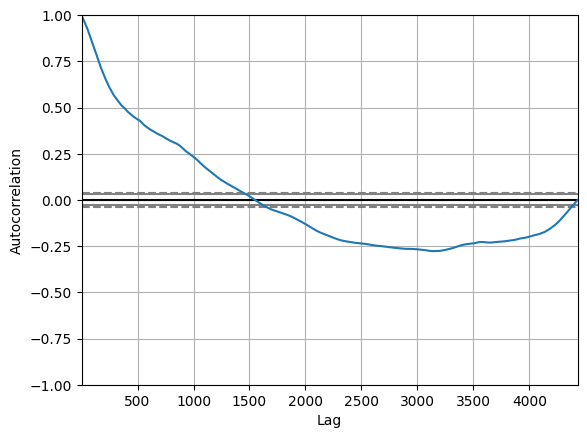

In [4]:
# examine autocorrelation
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Close'])

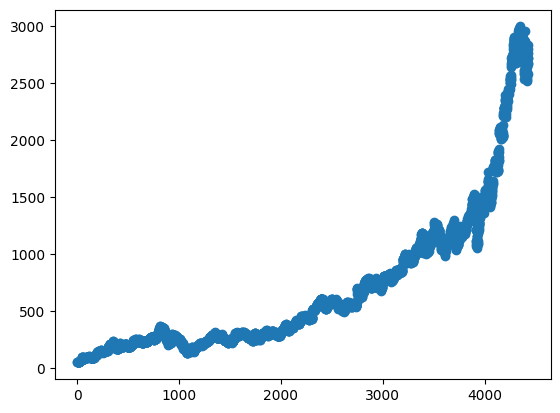

In [28]:
plt.scatter(df.index, df['Close'])

Text(0.5, 1.0, '2nd Order Differencing')

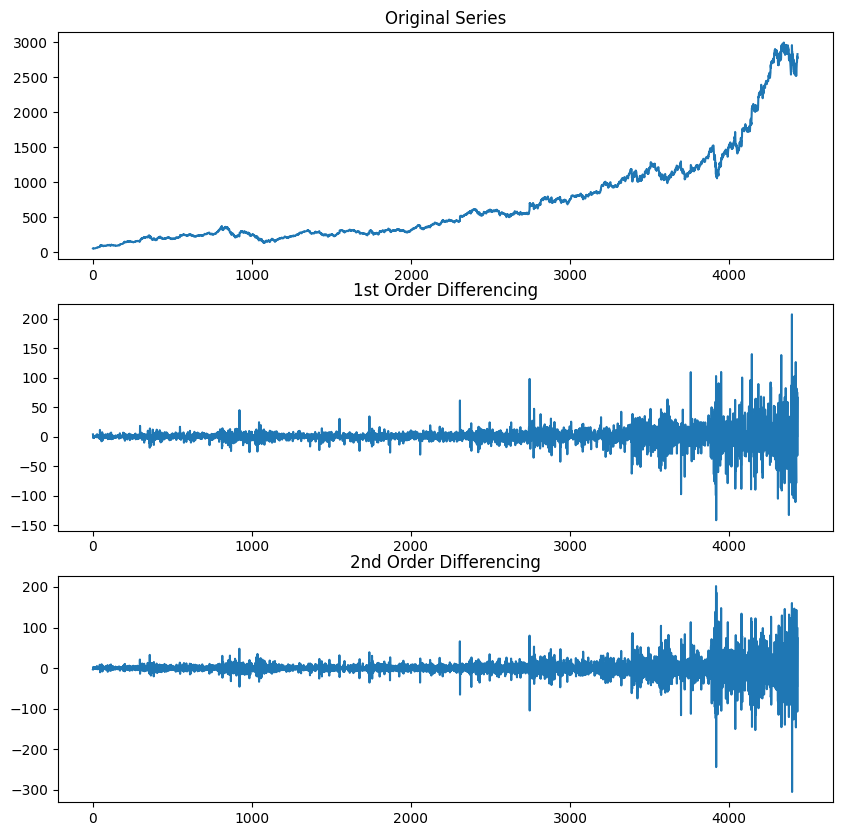

In [29]:
# plot different levels for differencing
fig, ax = plt.subplots(3, figsize=(10,10))
ax[0].plot(df['Close'])
ax[0].set_title('Original Series')
ax[1].plot(df['Close'].diff())
ax[1].set_title('1st Order Differencing')
ax[2].plot(df['Close'].diff().diff())
ax[2].set_title('2nd Order Differencing')

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# extrapolate 30 days into the future
arima = ARIMA(df['Close'][:-30], order=(10,3,5))
model = arima.fit()
forecast = model.predict(start=len(df)-30, end=len(df), typ='levels').rename('Forecast')

c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


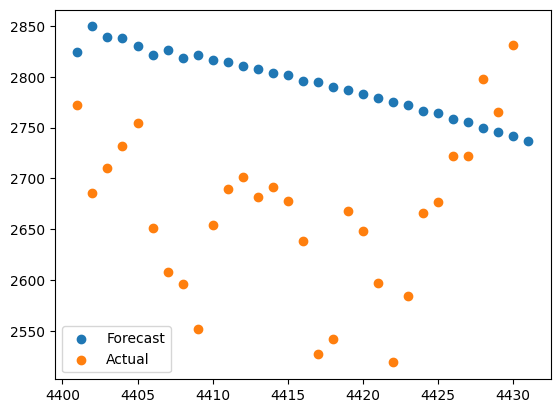

In [38]:
plt.scatter(forecast.index.values, forecast.values)
plt.scatter(df['Close'][-30:].index.values, df['Close'][-30:].values)
plt.legend(['Forecast', 'Actual'])